In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
train.shape, test.shape, submission.shape

((891, 12), (418, 11), (418, 2))

In [0]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [0]:
train[['Survived', 'Pclass']].groupby(['Pclass']).mean(), 

(        Survived
 Pclass          
 1       0.629630
 2       0.472826
 3       0.242363,)

Pclass has good correlation. Has to consider into model

In [0]:
train[['Survived', 'Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


Sex also has good correlation. Females has good probaliblity of srviving 

In [0]:
train[['Survived', 'SibSp']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Not good. But seems that passengers with medium siblings has good probablity of survival

In [0]:
train[['Survived', 'Parch']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Same trend as in SibSp. Moreover, both feratures are related to family. So it is better to add them and analyze them

In [0]:
train[['Survived', 'Embarked']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


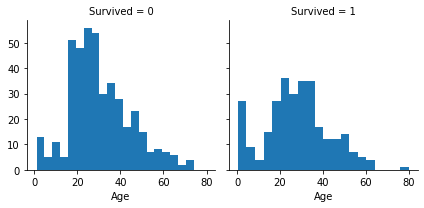

In [0]:
import seaborn as sns
grid = sns.FacetGrid(train, col = 'Survived')
grid.map(plt.hist, 'Age', bins = 20)

Looking like normal distribution on both sides. But we have to dig more

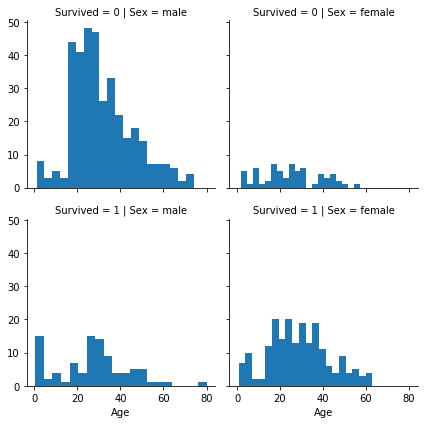

In [0]:
grid = sns.FacetGrid(train, row = 'Survived', col = 'Sex')
grid.map(plt.hist, 'Age', bins = 20)

This one gives clearer picture. Sex varies in terms of Age distribution. It will help us to estimate null values. 
Most of thr women of were survived. 
In men, more than 50% of children and old people were survived. 
75% of adult men were died.

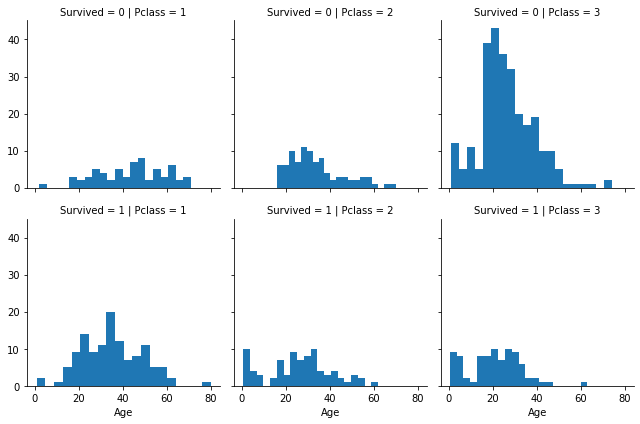

In [0]:
grid = sns.FacetGrid(train, row = 'Survived', col = 'Pclass')
grid.map(plt.hist, 'Age', bins = 20)

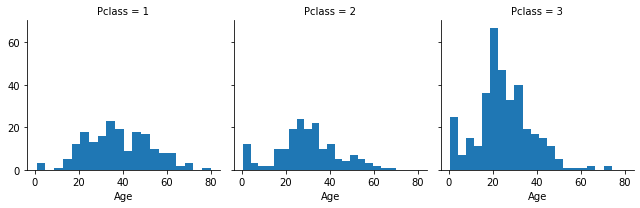

In [0]:
grid = sns.FacetGrid(train, col = 'Pclass')
grid.map(plt.hist, 'Age', bins = 20)

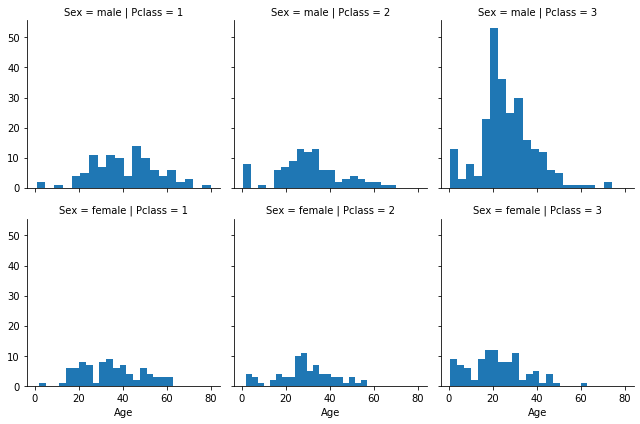

In [0]:
grid = sns.FacetGrid(train, col = 'Pclass', row = 'Sex')
grid.map(plt.hist, 'Age', bins = 20)

In [0]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

In [0]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Sir           1
Capt          1
Lady          1
Don           1
Ms            1
Mme           1
Jonkheer      1
Name: Title, dtype: int64

In [0]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

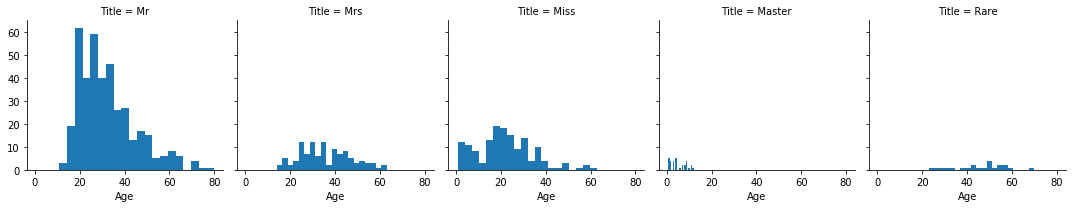

In [0]:
grid = sns.FacetGrid(train, col = 'Title')
grid.map(plt.hist, 'Age', bins = 20)

In [0]:
train['TitleEnc'] = train['Title']
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'TitleEnc'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['TitleEnc'] = encoder.fit_transform(train.Title.values)
test['TitleEnc'] = encoder.fit_transform(test.Title.values)
train.TitleEnc.value_counts(), test.TitleEnc.value_counts() 

(2    517
 1    185
 3    126
 0     40
 4     23
 Name: TitleEnc, dtype: int64, 2    240
 1     79
 3     72
 0     21
 4      6
 Name: TitleEnc, dtype: int64)

In [0]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 Title            0
 TitleEnc         0
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 Title            0
 TitleEnc         0
 dtype: int64)

In [0]:
data = pd.concat([train, test], axis = 0, sort = False)
print(data.shape)
guess_age = np.zeros((3,5))#pclass/title
for i in range(3):
  for j in range(5):
    guess_df = data[(data.Pclass == i+1) & (data.TitleEnc == j)]['Age'].dropna()
    guess_age[i][j] = guess_df.mean()
    guess_age[i][j] = round(guess_age[i][j])
    train.loc[(train.Pclass == i+1)&(train.TitleEnc == j) & (train.Age.isnull()),'Age'] = guess_age[i][j]
    test.loc[(test.Pclass == i+1)&(test.TitleEnc == j) & (test.Age.isnull()),'Age'] = guess_age[i][j]

(1309, 14)


In [0]:
train.Age.isnull().sum(), test.Age.isnull().sum()

(0, 0)

In [0]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleEnc
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,2


In [0]:
test.Fare.fillna(test.loc[(test.Pclass == 3) & (test.Embarked == 'S'),'Fare'].mean(), inplace = True)

In [0]:
train.Embarked.fillna('S', inplace = True)

In [0]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 Title            0
 TitleEnc         0
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 Title            0
 TitleEnc         0
 dtype: int64)

In [0]:
train.drop(['Cabin'], inplace = True, axis = 1)
test.drop(['Cabin'], inplace = True, axis = 1)

In [0]:
train.drop(['Name'], inplace = True, axis = 1)
test.drop(['Name'], inplace = True, axis = 1)
train['Family'] = train.SibSp + train.Parch
test['Family'] = test.SibSp + test.Parch

In [0]:
train[['Family','Survived']].groupby(['Family']).mean()

,Survived
Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [0]:
train.Family.replace([1,2,3], 1, inplace=True)
train.Family.replace(range(4,11), 2, inplace=True)
test.Family.replace([1,2,3], 1, inplace=True)
test.Family.replace(range(4,11), 2, inplace=True)

In [0]:
train[['Family','Survived']].groupby(['Family']).mean()

,Survived
Family,
0,0.303538
1,0.578767
2,0.161290


In [0]:
train.drop(['PassengerId'], inplace=True,axis =1)
test.drop(['PassengerId'], inplace=True, axis=1)

In [0]:
train.drop(['SibSp','Parch','Ticket'], inplace=True,axis =1)
test.drop(['SibSp','Parch','Ticket'], inplace=True, axis=1)

In [0]:
labels = train.Survived
train.drop(['Survived'], axis =1, inplace = True)

# Encoding

In [0]:
trainReg = train.copy()
trainClf = train.copy()
testReg = test.copy()
testClf = test.copy()
print(train.shape,test.shape)
data = pd.concat([train, test], axis = 0, sort = False, copy = False)

(891, 9) (418, 8)


In [0]:
trainReg.drop(['TitleEnc'], inplace = True, axis =1)
testReg.drop(['TitleEnc'], inplace = True, axis =1)

In [0]:
data.Sex.dtype

dtype('O')

In [0]:
for column in train.select_dtypes(['O']):
  dummy_cols = pd.get_dummies(train[column], prefix_sep='_', prefix=column, drop_first=True)
  trainReg = pd.concat([trainReg,dummy_cols],axis = 1)
  trainReg.drop([column], axis = 1, inplace = True)
for column in test.select_dtypes(['O']):
  dummy_cols = pd.get_dummies(test[column], prefix_sep='_', prefix=column, drop_first= True)
  testReg = pd.concat([testReg,dummy_cols],axis = 1)
  testReg.drop([column], axis = 1, inplace = True)

In [0]:
dummy_cols = pd.get_dummies(trainReg.Pclass, 'Pclass', '_', drop_first=True)
trainReg = pd.concat([trainReg, dummy_cols], axis = 1)
dummy_cols = pd.get_dummies(testReg.Pclass, 'Pclass', '_', drop_first=True)
testReg = pd.concat([testReg, dummy_cols], axis = 1)

In [0]:
trainReg.drop(['Pclass'], inplace = True, axis = 1)
testReg.drop(['Pclass'], inplace = True, axis = 1)

In [0]:
trainReg.head()

,Survived,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,1,0,1,0,1,0,0,0,1
1,1,38.0,71.2833,1,0,0,0,0,0,1,0,0,0
2,1,26.0,7.9250,0,0,0,1,1,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0
4,0,35.0,8.0500,0,1,0,1,0,1,0,0,0,1


In [0]:
for column in trainClf.select_dtypes(['O']):
  trainClf[column] = encoder.fit_transform(trainClf[column])
  testClf[column] = encoder.fit_transform(testClf[column])

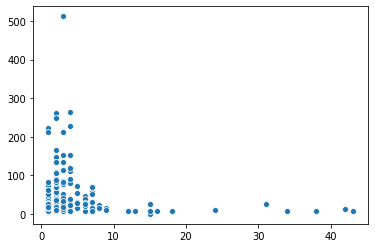

In [0]:
sns.scatterplot(train.Fare.value_counts().values, train.Fare.value_counts().index)

In [0]:
trainClf['FareBand'] = trainClf.loc[trainClf.Fare < 120, 'Fare'].astype('int')//10
trainClf.loc[trainClf.FareBand.isnull(), 'FareBand'] = trainClf.loc[trainClf.Fare >= 120, 'Fare'].astype('int')//50+10.
testClf['FareBand'] = testClf.loc[testClf.Fare < 120, 'Fare'].astype('int')//10
testClf.loc[testClf.FareBand.isnull(), 'FareBand'] = testClf.loc[testClf.Fare >= 120, 'Fare'].astype('int')//50+10.

In [0]:
trainClf['AgeBand'] = trainClf['Age']//10
testClf['AgeBand'] = testClf['Age']//10
trainClf.drop(['Age', 'Fare'], axis = 1, inplace = True)
testClf.drop(['Age', 'Fare'], axis = 1, inplace = True)

In [0]:
testClf.drop(['TitleEnc'], axis = 1, inplace = True)

In [0]:
trainClf.drop(['TitleEnc'], axis = 1, inplace = True)

In [0]:
for column in trainClf:
  trainClf[column] = trainClf[column].astype('int')
for column in testClf:
  testClf[column] = testClf[column].astype('int')

In [0]:
trainClf.head(20)

,Survived,Pclass,Sex,Embarked,Title,Family,FareBand,AgeBand
0,0,3,1,2,2,1,0,2
1,1,1,0,0,3,1,7,3
2,1,3,0,2,1,0,0,2
3,1,1,0,2,3,1,5,3
4,0,3,1,2,2,0,0,3
5,0,3,1,1,2,0,0,2
6,0,1,1,2,2,0,5,5
7,0,3,1,2,0,2,2,0
8,1,3,0,2,3,1,1,2
9,1,2,0,0,3,1,3,1


In [0]:
trainReg.isnull().sum()

Survived      0
Age           0
Fare          0
Family        0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
Title_Rare    0
Pclass_2      0
Pclass_3      0
dtype: int64

In [0]:
labels = trainReg.Survived
trainReg.drop(['Survived'], axis =1, inplace = True)

In [0]:
trainReg.head()

,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_2,Pclass_3
0,22.0,7.2500,1,1,0,1,0,1,0,0,0,1
1,38.0,71.2833,1,0,0,0,0,0,1,0,0,0
2,26.0,7.9250,0,0,0,1,1,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,0,0
4,35.0,8.0500,0,1,0,1,0,1,0,0,0,1


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.svm import SVC
scaler = StandardScaler()
dtf = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
svc = SVC()

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainReg = scaler.fit_transform(trainReg)
trainReg[:5]

array([[-0.54545343, -0.50244517,  0.8557739 ,  0.73769513, -0.30756234,
         0.61583843, -0.5118981 ,  0.85053175, -0.40583972, -0.16278113,
        -0.51015154,  0.90258736],
       [ 0.63843555,  0.78684529,  0.8557739 , -1.35557354, -0.30756234,
        -1.62380254, -0.5118981 , -1.17573506,  2.4640269 , -0.16278113,
        -0.51015154, -1.10792599],
       [-0.24948118, -0.48885426, -0.74947777, -1.35557354, -0.30756234,
         0.61583843,  1.95351381, -1.17573506, -0.40583972, -0.16278113,
        -0.51015154,  0.90258736],
       [ 0.41645637,  0.42073024,  0.8557739 , -1.35557354, -0.30756234,
         0.61583843, -0.5118981 , -1.17573506,  2.4640269 , -0.16278113,
        -0.51015154, -1.10792599],
       [ 0.41645637, -0.48633742, -0.74947777,  0.73769513, -0.30756234,
         0.61583843, -0.5118981 ,  0.85053175, -0.40583972, -0.16278113,
        -0.51015154,  0.90258736]])

In [0]:
testReg = scaler.transform(testReg)

In [0]:
temp = pd.DataFrame(trainReg)

In [0]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.545453,-0.502445,0.855774,0.737695,-0.307562,0.615838,-0.511898,0.850532,-0.405840,-0.162781,-0.510152,0.902587
1,0.638436,0.786845,0.855774,-1.355574,-0.307562,-1.623803,-0.511898,-1.175735,2.464027,-0.162781,-0.510152,-1.107926
2,-0.249481,-0.488854,-0.749478,-1.355574,-0.307562,0.615838,1.953514,-1.175735,-0.405840,-0.162781,-0.510152,0.902587
3,0.416456,0.420730,0.855774,-1.355574,-0.307562,0.615838,-0.511898,-1.175735,2.464027,-0.162781,-0.510152,-1.107926
4,0.416456,-0.486337,-0.749478,0.737695,-0.307562,0.615838,-0.511898,0.850532,-0.405840,-0.162781,-0.510152,0.902587


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kfold = KFold(n_splits=5)
reg = LogisticRegression()
reg_acc_train = []
reg_acc_val = []
for train_index, test_index in kfold.split(trainReg):
  x_train = trainReg[train_index]
  y_train = labels[train_index]
  x_val = trainReg[test_index]
  y_val = labels[test_index]
  reg.fit(x_train, y_train)
  reg_acc_train.append(reg.score(x_train,y_train))
  y_pred = reg.predict(x_val)
  reg_acc_val.append(accuracy_score(y_val, y_pred))
print(sum(reg_acc_train)/5)
print(sum(reg_acc_val)/5)
  


0.837822068487322
0.8271420500910175


In [0]:
labels.mean()

0.3838383838383838

The accuracy scores are good. We have to check other models too. Before that let's reduce the dimensionality and overview the data in 3D

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
train_3d = pca.fit_transform(trainClf)
print(pca.explained_variance_ratio_)

[0.74338873 0.13601921 0.03620555]


In [0]:
train_3d[:5]

array([[-2.46557939, -0.32179209, -0.49324818],
       [ 4.98354831,  0.48061796,  1.32673223],
       [-2.45682456, -0.59992036, -0.16093664],
       [ 2.9238315 ,  0.70927852, -0.50273999],
       [-2.44471019,  0.73171649, -0.36388677]])

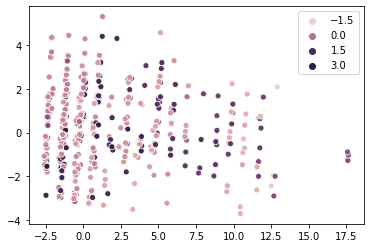

In [0]:
import seaborn as sns
sns.scatterplot(x = train_3d[:,0], y = train_3d[:,1], hue = train_3d[:,2])

In [0]:
trainClf.drop(['Survived'], inplace = True, axis = 1)

In [0]:
trainClf.iloc[149]

Pclass      2
Sex         1
Embarked    2
Title       4
Family      0
FareBand    1
AgeBand     4
Name: 149, dtype: int64

In [0]:
trainClf_array = np.array(trainClf)
trainClf_array[:5]

array([[3, 1, 2, 2, 1, 0, 2],
       [1, 0, 0, 3, 1, 7, 3],
       [3, 0, 2, 1, 0, 0, 2],
       [1, 0, 2, 3, 1, 5, 3],
       [3, 1, 2, 2, 0, 0, 3]])

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth= 9)
kfold = KFold(n_splits=5)

rfc_acc_train = []
rfc_acc_val = []
for train_index, test_index in kfold.split(trainClf):
  x_train = trainClf.iloc[train_index]
  y_train = labels[train_index]
  x_val = trainClf.iloc[test_index]
  y_val = labels[test_index]
  rfc.fit(x_train, y_train)
  rfc_acc_train.append(rfc.score(x_train,y_train))
  y_pred = rfc.predict(x_val)
  rfc_acc_val.append(accuracy_score(y_val, y_pred))
print(sum(rfc_acc_train)/5)
print(sum(rfc_acc_val)/5)

0.9009541894511244
0.8226853304877284


In [0]:
Too much overfitting. 

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 5)
kfold = KFold(n_splits=5)

dtc_acc_train = []
dtc_acc_val = []
for train_index, test_index in kfold.split(trainClf):
  x_train = trainClf.iloc[train_index]
  y_train = labels[train_index]
  x_val = trainClf.iloc[test_index]
  y_val = labels[test_index]
  dtc.fit(x_train, y_train)
  dtc_acc_train.append(dtc.score(x_train,y_train))
  y_pred = dtc.predict(x_val)
  dtc_acc_val.append(accuracy_score(y_val, y_pred))
print(sum(dtc_acc_train)/5)
print(sum(dtc_acc_val)/5)

0.857183210678097
0.8204318624066286


Looks like Tree classifiers are working better than regression Let's try XGBoost. Should not forget KNN

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
kfold = KFold(n_splits=5)
xgb_acc_train = []
xgb_acc_val = []
for train_index, test_index in kfold.split(trainClf):
  x_train = trainClf.iloc[train_index]
  y_train = labels[train_index]
  x_val = trainClf.iloc[test_index]
  y_val = labels[test_index]
  xgb.fit(x_train, y_train)
  xgb_acc_train.append(xgb.score(x_train,y_train))
  y_pred = xgb.predict(x_val)
  xgb_acc_val.append(accuracy_score(y_val, y_pred))
print(sum(xgb_acc_train)/5)
print(sum(xgb_acc_val)/5)

0.8574637155869329
0.8215366267026551


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
kfold = KFold(n_splits=5)
knn_acc_train = []
knn_acc_val = []
for train_index, test_index in kfold.split(trainReg):
  x_train = trainReg[train_index]
  y_train = labels[train_index]
  x_val = trainReg[test_index]
  y_val = labels[test_index]
  knn.fit(x_train, y_train)
  knn_acc_train.append(knn.score(x_train,y_train))
  y_pred = knn.predict(x_val)
  knn_acc_val.append(accuracy_score(y_val, y_pred))
print(sum(knn_acc_train)/5)
print(sum(knn_acc_val)/5)

0.8162164930582915
0.8035904839620865


KNN is also not working that well. So let's go with RandomForest only

In [0]:
y_test = rfc.predict(testClf)

In [0]:
submission = pd.read_csv('gender_submission.csv')

In [0]:
len(submission), len(y_test)

(418, 418)

In [0]:
submission.Survived = y_test

In [0]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [0]:
submission.to_csv('gender_submitted.csv', index= False)